<a href="https://colab.research.google.com/github/ajaykrish244/banana-leaf-disease-detection/blob/feature%2FResnet/banana_leaf_disease_detection_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
import os
from google.colab import drive
drive.mount('/content/drive/')
import seaborn as sns
import pandas as pd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
img_height,img_width=(224,224)
batch_size=32

test_data_dir="/content/drive/My Drive/Colab Notebooks/test"
train_data_dir="/content/drive/My Drive/Colab Notebooks/train"
valid_data_dir="/content/drive/My Drive/Colab Notebooks/val"

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 shear_range=0.2,
                                 zoom_range=0.2,horizontal_flip=True,
                                 validation_split=0.4)

In [ ]:
train_genrator=train_datagen.flow_from_directory(train_data_dir,
                                                 target_size= (img_height,img_width),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

Found 777 images belonging to 4 classes.


In [ ]:
valid_genrator=train_datagen.flow_from_directory(valid_data_dir,
                                                 target_size= (img_height,img_width),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

Found 80 images belonging to 4 classes.


In [ ]:
test_genrator=train_datagen.flow_from_directory(test_data_dir,
                                                 target_size= (img_height,img_width),
                                                 batch_size=1,
                                                 class_mode='categorical')

Found 80 images belonging to 4 classes.


In [ ]:
x,y= test_genrator.next()
x.shape

(1, 224, 224, 3)

In [ ]:
base_model=ResNet50(include_top= False, weights='imagenet')
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024, activation='relu')(x)
predictions=Dense(train_genrator.num_classes , activation= 'softmax')(x)
model=Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable= False

model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_genrator, epochs=10)

94781440/94765736 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99 bytes but only got 74. Skipping tag 45059
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/JpegImagePlugin.py:793: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Epoch 1/10
25/25 [==============================] - 343s 13s/step - loss: 1.2302 - accuracy: 0.7735
Epoch 2/10
25/25 [==============================] - 147s 6s/step - loss: 0.0785 - accuracy: 0.9730
Epoch 3/10
25/25 [==============================] - 143s 6s/step - loss: 0.0514 - accuracy: 0.9807
Epoch 4/10
25/25 [==============================] - 143s 6s/step - loss: 0.0203 - accuracy: 0.9974
Epoch 5/10
25/25 [==============================] - 143s 6s/step - loss: 0.0338 - accuracy: 0.9884
Epoch 6/10
25/25 [==============================] - 143s 6s/step - loss: 0.0243 - accuracy: 0.9910
Epoch 7/10
25/25 [==============================] - 143s 6s/step - loss: 0.0096 - accuracy: 0.9961
Epoch 8/10
25/25 [==============================] - 143s 6s/step - loss: 0.0061 - accuracy: 0.9987
Epoch 9/10
25/25 [==============================] - 142s 6s/step - loss: 0.0023 - accuracy: 1.0000
Epoch 10/10
25/25 [==============================] - 142s 6s/step - loss: 0.0088 - accuracy: 0.9987


In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/data.hr")

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/data.hr/assets


In [ ]:
test_loss,test_acc = model.evaluate(test_genrator, verbose=2)
print('\nTest accuracy:' , test_acc)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99 bytes but only got 74. Skipping tag 45059
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/JpegImagePlugin.py:793: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


80/80 - 39s - loss: 0.1242 - accuracy: 0.9625 - 39s/epoch - 482ms/step

Test accuracy: 0.9624999761581421


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99 bytes but only got 74. Skipping tag 45059
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/JpegImagePlugin.py:793: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


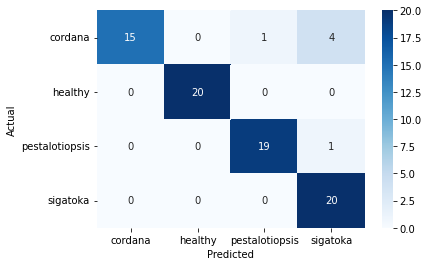

TypeError: ignored

In [ ]:
model=tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/data.hr")
filenames=test_genrator.filenames
nb_samples=len(test_genrator)
y_prob=[]
y_act=[]
test_genrator.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_genrator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class=[list(train_genrator.class_indices.keys()) [i.argmax()] for i in y_prob]
actual_class=[list(train_genrator.class_indices.keys()) [i.argmax()] for i in y_act]


out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix=pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')
plt.show()
print('test_accuracy:{}'.format((np.diagonal(confusion_matrix).sum/confusion_matrix.sum().sum()*100)))
